# Download and Read OpenMesh Dataset from Zenodo

This notebook demonstrates how to:
1. Download the OpenMesh dataset from Zenodo
2. Extract the ZIP archive
3. Read and explore the NetCDF files

**Dataset:** https://zenodo.org/records/15287692

In [1]:
# Install required packages (uncomment if needed)
# !pip install requests xarray netCDF4 matplotlib pandas

In [10]:
import requests
import zipfile
from pathlib import Path
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

print("✓ All packages imported successfully")

✓ All packages imported successfully


## 1. Download Dataset from Zenodo

In [11]:
# Zenodo configuration
ZENODO_RECORD_ID = "15287692"
ZENODO_URL = f"https://zenodo.org/records/{ZENODO_RECORD_ID}/files/OpenMesh.zip?download=1"

# Local paths
DOWNLOAD_DIR = Path("../../data/openmesh")  # ✓ Correct
ZIP_FILE = DOWNLOAD_DIR / "OpenMesh.zip"
EXTRACT_DIR = DOWNLOAD_DIR / "extracted"

# Create directories
DOWNLOAD_DIR.mkdir(parents=True, exist_ok=True)

print(f"Download directory: {DOWNLOAD_DIR.absolute()}")
print(f"ZIP file: {ZIP_FILE}")
print(f"Extract to: {EXTRACT_DIR}")


Download directory: /Users/drorjac/PycharmProjects/OpenMesh-fresh/src/fetch_data/OpenMesh/../../data/openmesh
ZIP file: ../../data/openmesh/OpenMesh.zip
Extract to: ../../data/openmesh/extracted


In [12]:
def download_file(url, output_path, chunk_size=8192):
    """
    Download a file with progress bar
    """
    if output_path.exists():
        print(f"✓ File already exists: {output_path.name}")
        return True
    
    print(f"Downloading from Zenodo...")
    
    try:
        response = requests.get(url, stream=True, timeout=30)
        response.raise_for_status()
        
        total_size = int(response.headers.get('content-length', 0))
        
        with open(output_path, 'wb') as f:
            with tqdm(total=total_size, unit='B', unit_scale=True, desc=output_path.name) as pbar:
                for chunk in response.iter_content(chunk_size=chunk_size):
                    if chunk:
                        f.write(chunk)
                        pbar.update(len(chunk))
        
        print(f"✓ Download complete: {output_path.name}")
        return True
        
    except Exception as e:
        print(f"✗ Download failed: {e}")
        if output_path.exists():
            output_path.unlink()
        return False

In [5]:
# Download the dataset
success = download_file(ZENODO_URL, ZIP_FILE)

if success:
    file_size_mb = ZIP_FILE.stat().st_size / (1024 * 1024)
    print(f"\nFile size: {file_size_mb:.2f} MB")

OpenMesh.zip:   0%|          | 0.00/13.7M [00:00<?, ?B/s]

✓ Download complete: OpenMesh.zip

File size: 13.10 MB


## 2. Extract ZIP Archive

In [14]:
def extract_zip(zip_path, extract_to):
    """
    Extract ZIP archive with progress
    """
    if extract_to.exists() and any(extract_to.iterdir()):
        print(f"✓ Already extracted to: {extract_to}")
        return True
    
    print(f"Extracting {zip_path.name}...")
    
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            members = zip_ref.namelist()
            
            with tqdm(total=len(members), desc="Extracting") as pbar:
                for member in members:
                    zip_ref.extract(member, extract_to)
                    pbar.update(1)
        
        print(f"✓ Extraction complete: {len(members)} files")
        return True
        
    except Exception as e:
        print(f"✗ Extraction failed: {e}")
        return False

In [15]:
# Extract the dataset
if ZIP_FILE.exists():
    extract_zip(ZIP_FILE, EXTRACT_DIR)
    
    # List extracted files
    print("\nExtracted files:")
    for file in sorted(EXTRACT_DIR.rglob("*")):
        if file.is_file():
            size_mb = file.stat().st_size / (1024 * 1024)
            print(f"  {file.relative_to(EXTRACT_DIR)} ({size_mb:.2f} MB)")
else:
    print("✗ ZIP file not found. Download first.")

✓ Already extracted to: ../../data/openmesh/extracted

Extracted files:
  dataset/README.txt (0.01 MB)
  dataset/links/ds_openmesh.nc (305.42 MB)
  dataset/links/links_metadata.csv (0.01 MB)
  dataset/links/openmesh_dataset_example.ipynb (0.56 MB)
  dataset/maps/directional_map.html (0.45 MB)
  dataset/maps/frequency_map.html (0.46 MB)
  dataset/weather stations/ASOS_stations.csv (0.00 MB)
  dataset/weather stations/pws_metadata.csv (0.00 MB)
  dataset/weather stations/pws_opensense_sample_jan.nc (9.37 MB)
  dataset/weather stations/read_pws_sample.ipynb (0.99 MB)


## 3. Read Commercial Microwave Links (CML) Data

In [8]:
# Path to CML NetCDF file
cml_file = EXTRACT_DIR / "dataset" / "links" / "ds_openmesh.nc"

if not cml_file.exists():
    print(f"✗ File not found: {cml_file}")
    print("   Make sure the dataset is extracted correctly.")
else:
    print(f"✓ Found CML data: {cml_file.name}")

✓ Found CML data: ds_openmesh.nc


In [9]:
# Open the CML dataset
ds_links = xr.open_dataset(cml_file)

print("MICROWAVE LINKS (CML) DATASET")
print("=" * 60)
print(ds_links)

MICROWAVE LINKS (CML) DATASET
<xarray.Dataset> Size: 322MB
Dimensions:       (cml_id: 75, sublink_id: 3, time: 354241)
Coordinates:
  * time          (time) datetime64[ns] 3MB 2023-10-29 ... 2024-07-01
  * sublink_id    (sublink_id) object 24B 'sublink_1' 'sublink_2' 'sublink_3'
    site_0_lat    (cml_id) float32 300B ...
    site_0_lon    (cml_id) float32 300B ...
    site_1_lat    (cml_id) float32 300B ...
    site_1_lon    (cml_id) float32 300B ...
    length        (cml_id) float32 300B ...
    frequency     (cml_id, sublink_id) float32 900B ...
    polarization  (cml_id, sublink_id) object 2kB ...
  * cml_id        (cml_id) <U2 600B '1' '2' '3' '4' '5' ... '72' '73' '74' '75'
Data variables:
    rsl           (cml_id, sublink_id, time) float32 319MB ...
Attributes:
    title:                 OpenMesh
    file_author:           Dror Jacoby
    institution:           Cellular Environmental Monitoring (CellEnMon) Lab,...
    date:                  2025-11-01
    source:              

In [12]:
ds_links.attrs

{'title': 'OpenMesh',
 'file_author': 'Dror Jacoby',
 'institution': 'Cellular Environmental Monitoring (CellEnMon) Lab, School of Electrical Engineering, Tel-Aviv University; Wireless and Mobile Networking (WiMNet) Lab, Department of Electrical Engineering, Columbia University',
 'date': '2025-11-01',
 'source': 'Community NYC Mesh Wireless Network',
 'history': '2025-11-01: Updated metadata, converted netCDF → OpenSense-1.0 CML format',
 'naming_convention': 'OpenSense-1.0',
 'license_restrictions': 'CC BY 4.0 – https://creativecommons.org/licenses/by/4.0/',
 'reference': 'https://doi.org/10.5281/zenodo.15287692',
 'comment': 'OpenMesh: Wireless Signal Dataset for Opportunistic Urban Weather Sensing in New York City. Data covers the period 2023-10-29 to 2024-07-01 (UTC). All timestamps are in UTC. Signal levels are in dBm. This dataset is described in the associated publication: https://essd.copernicus.org/preprints/essd-2025-238/',
 'Conventions': 'OpenSense-CML-v1.0'}

In [14]:
# Dataset overview
print("\nDataset Summary:")
print(f"  Time range: {ds_links.time.min().values} to {ds_links.time.max().values}")
print(f"  Number of sublinks: {len(ds_links.sublink_id)}")
print(f"  Number of time steps: {len(ds_links.time)}")
print(f"  Temporal resolution: {pd.Timedelta(ds_links.time.diff('time').median().values)}")

# Available variables
print("\nData Variables:")
for var in ds_links.data_vars:
    print(f"  - {var}: {ds_links[var].attrs.get('long_name', 'N/A')}")
    print(f"    Units: {ds_links[var].attrs.get('units', 'N/A')}")

# Coordinates
print("\nCoordinates:")
for coord in ds_links.coords:
    if coord not in ['time', 'sublink_id']:
        print(f"  - {coord}: {ds_links[coord].attrs.get('long_name', 'N/A')}")


Dataset Summary:
  Time range: 2023-10-29T00:00:00.000000000 to 2024-07-01T00:00:00.000000000
  Number of sublinks: 3
  Number of time steps: 354241
  Temporal resolution: 0 days 00:01:00

Data Variables:
  - rsl: received_signal_level
    Units: dBm

Coordinates:
  - site_0_lat: site_0_latitude
  - site_0_lon: site_0_longitude
  - site_1_lat: site_1_latitude
  - site_1_lon: site_1_longitude
  - length: distance_between_pair_of_antennas
  - frequency: sublink_frequency
  - polarization: sublink_polarization
  - cml_id: commercial_microwave_link_identifier


### Visualize CML Data

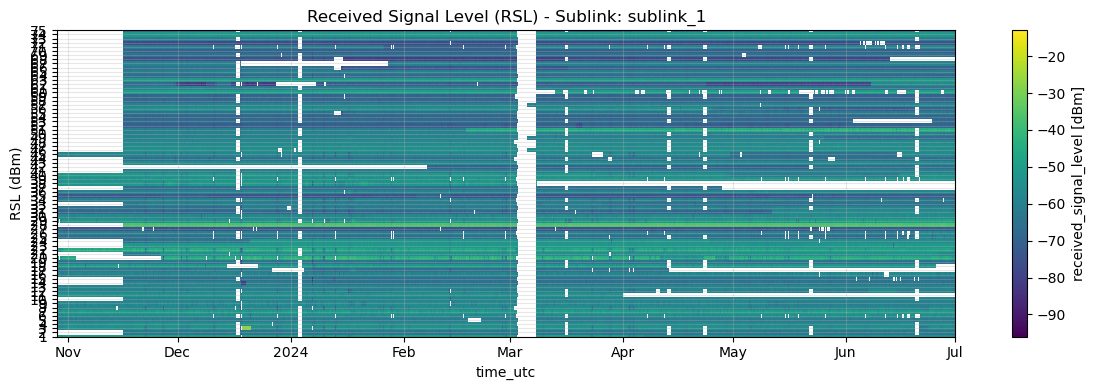

In [16]:
# Select a sample sublink
sample_sublink = ds_links.sublink_id[0].values

# Plot RSL time series
fig, ax = plt.subplots(figsize=(12, 4))

ds_links['rsl'].sel(sublink_id=sample_sublink).plot(ax=ax)
ax.set_title(f"Received Signal Level (RSL) - Sublink: {sample_sublink}")
ax.set_ylabel("RSL (dBm)")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Summary Statistics

## Next Steps

Now that you've successfully downloaded and explored the OpenMesh dataset, you can:

1. **Analyze CML data** for rainfall estimation using signal attenuation
2. **Compare PWS and CML observations** for validation
3. **Fetch additional NOAA ASOS data** using `src/datasets/noaa/` modules
4. **Develop custom analysis scripts** in the `analysis/` directory

### Useful Resources:
- OpenSense Standard: https://github.com/OpenSenseAction/opensense-standard
- ESSD Paper: https://essd.copernicus.org/preprints/essd-2025-238/
- Repository: https://github.com/drorjac/OpenMesh

In [19]:
# Close fetch_data
ds_links.close()
print("✓ Datasets closed")

✓ Datasets closed
